# Predicting Student Exam Scores - Machine Learning Project

In this notebook, we'll explore a dataset containing information about students and their exam scores. The goal is to build a machine learning model that predicts the scores of students on exams based on various factors.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
pd.options.display.max_columns = 50

## First Dataset
Performance on Maths course.

## Exploratory Data Analysis
Exploring properties and peculiarities of the datasets to get a better understanding.

#### Importing the dataset

In [27]:
df = pd.read_csv("student-mat.csv", sep=";")

#### Step 1: Understanding the data

In [28]:
# How many rows and columns?
df.shape

(395, 33)

We can see the dataset has 395 rows (entries), and 33 columns.

In [29]:
# Take a quick look
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [30]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,3,3,3,5,5,8,9,9


In [31]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


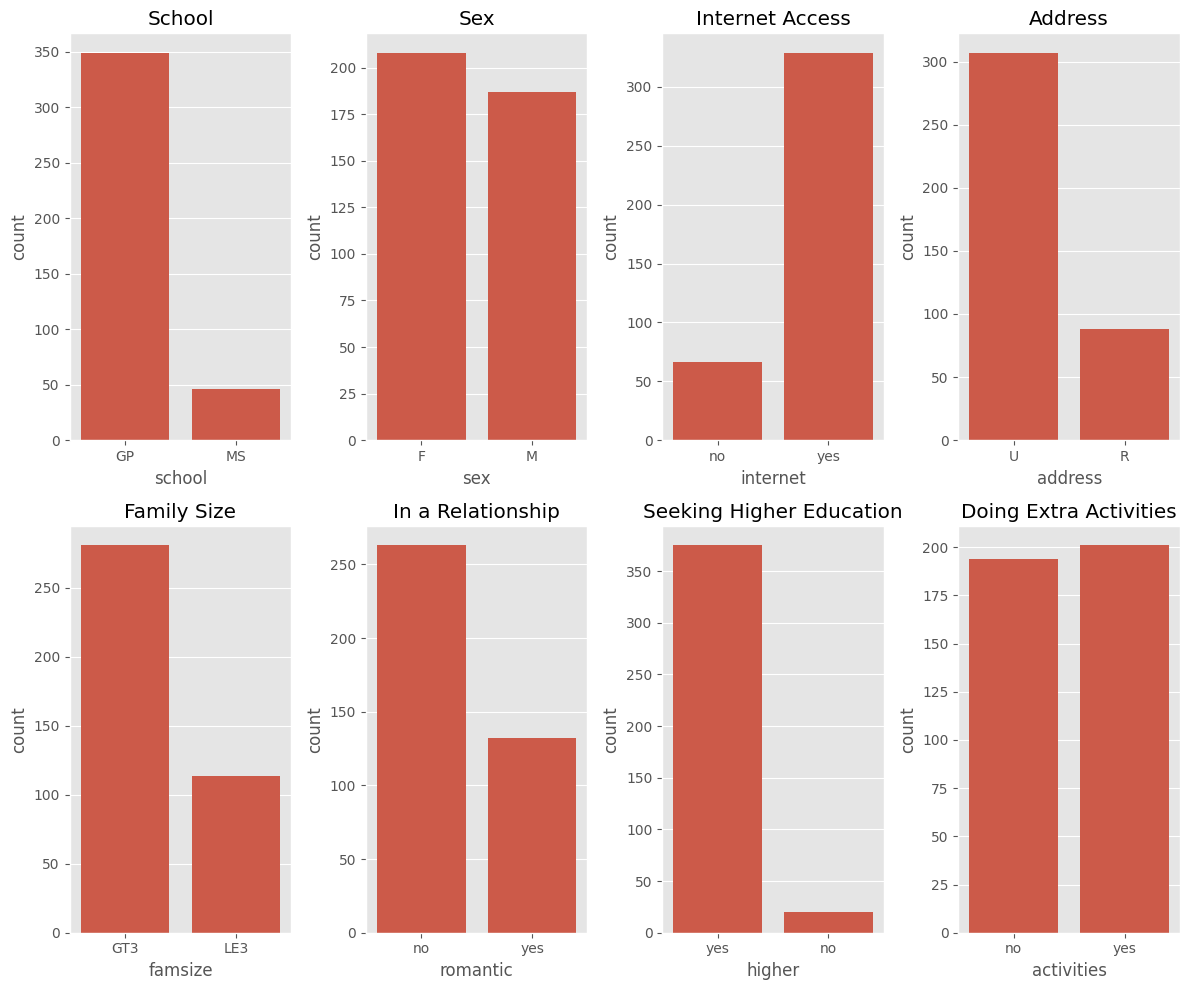

In [32]:
# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 10))

# Plotting countplots
sns.countplot(x='school', data=df, ax=axes[0, 0])
sns.countplot(x='sex', data=df, ax=axes[0, 1])
sns.countplot(x='internet', data=df, ax=axes[0, 2])
sns.countplot(x='address', data=df, ax=axes[0, 3])
sns.countplot(x='famsize', data=df, ax=axes[1, 0])
sns.countplot(x='romantic', data=df, ax=axes[1, 1])
sns.countplot(x='higher', data=df, ax=axes[1, 2])
sns.countplot(x='activities', data=df, ax=axes[1, 3])

# Adding titles
axes[0, 0].set_title('School')
axes[0, 1].set_title('Sex')
axes[0, 2].set_title('Internet Access')
axes[0, 3].set_title('Address')
axes[1, 0].set_title('Family Size')
axes[1, 1].set_title('In a Relationship')
axes[1, 2].set_title('Seeking Higher Education')
axes[1, 3].set_title('Doing Extra Activities')

# Adjusting layout
plt.tight_layout()
plt.show()

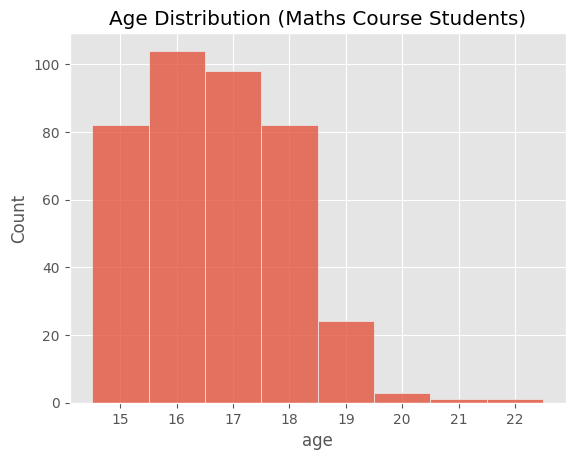

In [33]:
sns.histplot(data=df, x='age', bins=10, discrete=True)
plt.title("Age Distribution (Maths Course Students)")
plt.show()

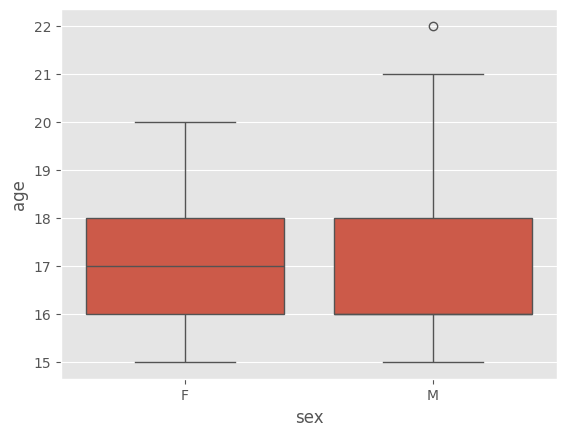

In [34]:
# Sex+Age Distribution
sns.boxplot(x='sex', y='age', data=df)
plt.show()

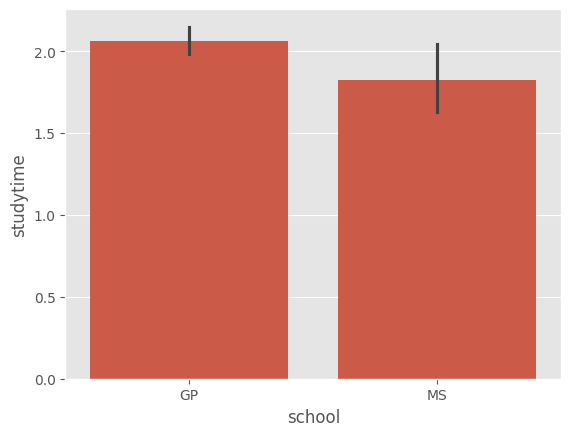

In [35]:
# Compare averages, e.g., studytime by school.
sns.barplot(x='school', y='studytime', data=df)
plt.show()

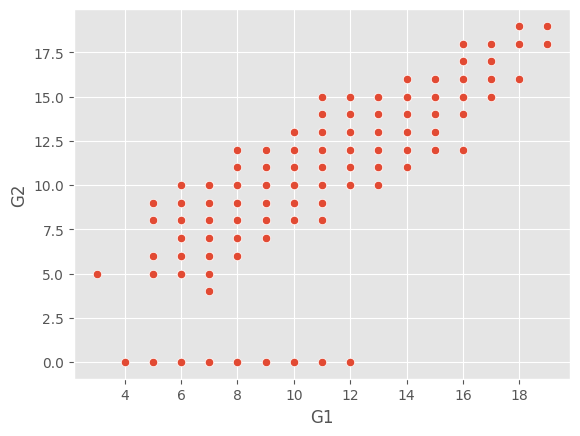

In [36]:
sns.scatterplot(x='G1', y='G2', data=df)
plt.show()

### Multivariate Analysis:
Explore the relationships between multiple variables.

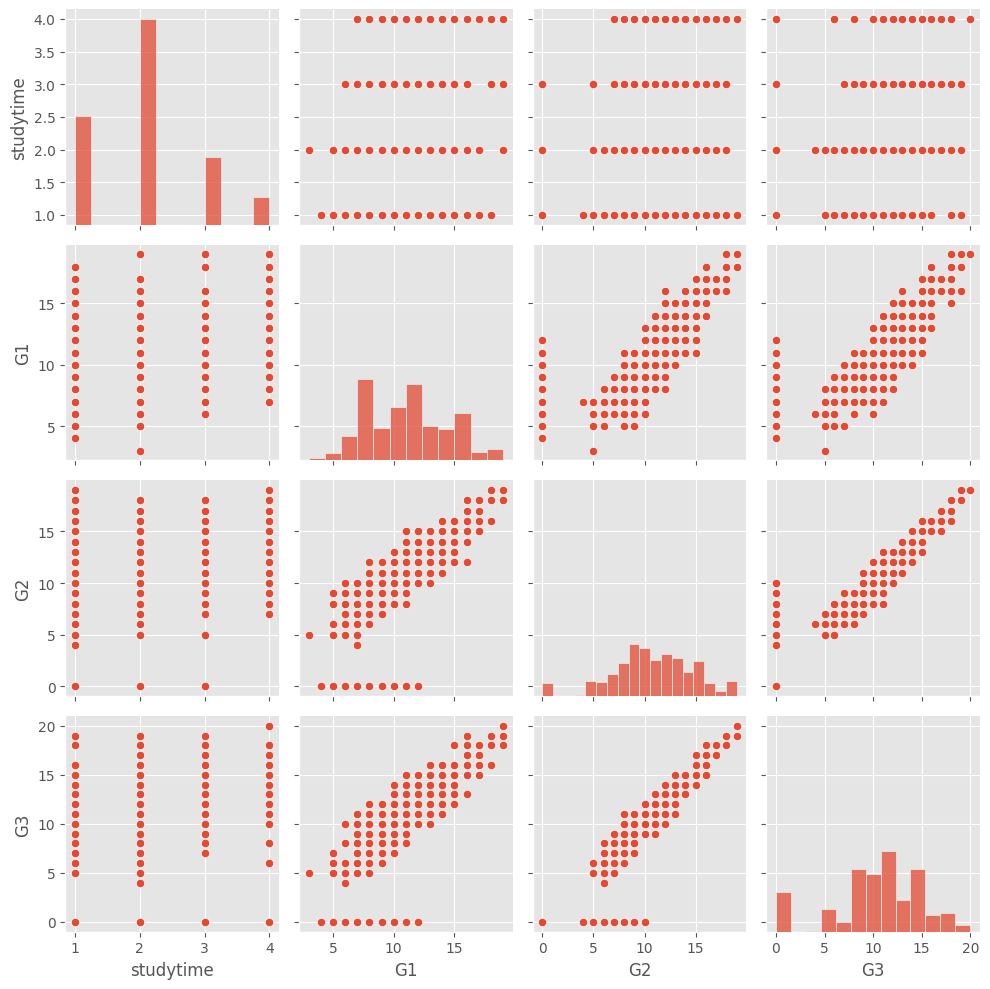

In [37]:
# Visualize relationships between multiple numeric variables
sns.pairplot(df[['studytime', 'G1', 'G2', 'G3']])
plt.tight_layout()
plt.show()

In [38]:
# Median score on each exam from each of the two schools
df.groupby("school")[["G1", "G2", "G3"]].median()

,G1,G2,G3
school,,,
GP,11.0,11.0,11.0
MS,10.5,10.0,10.0


### Preparing the dataset
Preparing the dataset to suit the Linear Regression model.

In [39]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [40]:
# Assuming 'df' is your DataFrame and 'Gender' is the column name
encoded_df = pd.get_dummies(df, columns=['sex'], prefix=['Is'], dtype="int")
encoded_df

,school,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Is_F,Is_M
0,GP,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,1,0
1,GP,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,1,0
2,GP,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,1,0
3,GP,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,1,0
4,GP,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,0,1
391,MS,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,0,1
392,MS,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,0,1
393,MS,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,0,1


#### Subsetting the dataset

In [41]:
work_df1 = df.iloc[:300].drop(columns=["school"])
work_df1

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,M,17,U,GT3,T,3,3,health,other,home,mother,1,1,0,no,yes,yes,no,yes,yes,yes,no,4,4,3,1,3,5,4,14,12,11
296,F,19,U,GT3,T,4,4,health,other,reputation,other,2,2,0,no,yes,yes,yes,yes,yes,yes,no,2,3,4,2,3,2,0,10,9,0
297,F,18,U,LE3,T,4,3,other,other,home,other,2,2,0,no,yes,yes,no,yes,yes,yes,yes,4,4,5,1,2,2,10,10,8,8
298,F,18,U,GT3,T,4,3,other,other,reputation,father,1,4,0,no,yes,yes,no,yes,yes,yes,no,4,3,3,1,1,3,0,14,13,14


In [42]:
# Perform one-hot encoding with customized column names
encoded_df = pd.get_dummies(work_df1, columns=['Fedu', "Medu", "studytime", "higher", "activities"], dtype="int")
encoded_df.head()

,sex,age,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,traveltime,failures,schoolsup,famsup,paid,nursery,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Fedu_0,Fedu_1,Fedu_2,Fedu_3,Fedu_4,Medu_0,Medu_1,Medu_2,Medu_3,Medu_4,studytime_1,studytime_2,studytime_3,studytime_4,higher_no,higher_yes,activities_no,activities_yes
0,F,18,U,GT3,A,at_home,teacher,course,mother,2,0,yes,no,no,yes,no,no,4,3,4,1,1,3,6,5,6,6,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0
1,F,17,U,GT3,T,at_home,other,course,father,1,0,no,yes,no,no,yes,no,5,3,3,1,1,3,4,5,5,6,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0
2,F,15,U,LE3,T,at_home,other,other,mother,1,3,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0
3,F,15,U,GT3,T,health,services,home,mother,1,0,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1
4,F,16,U,GT3,T,other,other,home,father,1,0,no,yes,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0


In [43]:
encoded_df.columns

Index(['sex', 'age', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason',
       'guardian', 'traveltime', 'failures', 'schoolsup', 'famsup', 'paid',
       'nursery', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'Fedu_0',
       'Fedu_1', 'Fedu_2', 'Fedu_3', 'Fedu_4', 'Medu_0', 'Medu_1', 'Medu_2',
       'Medu_3', 'Medu_4', 'studytime_1', 'studytime_2', 'studytime_3',
       'studytime_4', 'higher_no', 'higher_yes', 'activities_no',
       'activities_yes'],
      dtype='object')

In [44]:
y = encoded_df["G3"].iloc[:240]

In [45]:
features = ['age', 'Fedu_0', 'Fedu_1', 'Fedu_2',
       'Fedu_3', 'Fedu_4', 'Medu_0', 'Medu_1', 'Medu_2', 'Medu_3', 'Medu_4',
       'studytime_1', 'studytime_2', 'studytime_3', 'studytime_4', 'higher_no', 'higher_yes',
       'activities_no', 'activities_yes', "G1", "G2"]
X = encoded_df[features].iloc[:240]
test_X = encoded_df[features].iloc[241:]

In [46]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
testScoreModel = DecisionTreeRegressor(random_state=1)

# Fit model
testScoreModel.fit(X, y)

DecisionTreeRegressor(random_state=1)

#### Using the model
Now let's try to predict the scores of five students and see how the predictions compare against their actual scores on the G3 exam.

In [47]:
# We want to predict the gradeds of the following students
test_X.head()

,age,Fedu_0,Fedu_1,Fedu_2,Fedu_3,Fedu_4,Medu_0,Medu_1,Medu_2,Medu_3,Medu_4,studytime_1,studytime_2,studytime_3,studytime_4,higher_no,higher_yes,activities_no,activities_yes,G1,G2
241,17,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,10,11
242,16,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,6,0
243,16,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,13,12
244,18,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,7,0
245,16,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,18,18


In [48]:
print("Predicted grades:", [int(x) for x in list(testScoreModel.predict(test_X.tail()))], sep="\n")
print("Actual grades:", list(encoded_df["G3"].tail()), sep="\n")

Predicted grades:
[11, 9, 9, 12, 16]
Actual grades:
[11, 0, 8, 14, 16]
